In [121]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [122]:
#drop base_egg_steps
#binning experience growth, capture rate
pokemon = pd.read_csv('pokemon_bin_1.csv')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,Charmander,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [123]:
pokemon.isnull().sum()

against_bug              0
against_dark             0
against_dragon           0
against_electric         0
against_fairy            0
against_fight            0
against_fire             0
against_flying           0
against_ghost            0
against_grass            0
against_ground           0
against_ice              0
against_normal           0
against_poison           0
against_psychic          0
against_rock             0
against_steel            0
against_water            0
attack                   0
base_happiness           0
base_total               0
defense                  0
height_m                 0
hp                       0
name                     0
sp_attack                0
sp_defense               0
speed                    0
type1                    0
type2                    0
weight_kg                0
is_legendary             0
capture_rate_bin         0
experience_growth_bin    0
dtype: int64

In [124]:
pokemon = pokemon.set_index('name')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
Ivysaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
Venusaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
Charmander,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
Charmeleon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [125]:
df = pd.get_dummies(pokemon)

In [126]:
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Ivysaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Venusaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Charmander,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Charmeleon,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,0,570,103,9.2,97,107,101,61,999.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Kartana,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,0,570,131,0.3,59,59,31,109,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
Guzzlord,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,0,570,53,5.5,223,97,53,43,888.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [127]:
X, y = df.drop(['is_legendary'], axis = 1), df['is_legendary']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y)
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [128]:
train_X

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aipom,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,70,360,55,0.8,55,40,55,85,11.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Herdier,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,80,70,370,65,0.9,65,35,65,60,14.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
Whiscash,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,1.0,4.00,1.0,1.0,1.0,0.5,1.0,0.5,0.5,1.0,78,70,468,73,0.9,110,76,71,60,23.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Roserade,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,70,70,515,65,0.9,60,125,105,90,14.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
Spoink,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,25,70,330,35,0.7,60,70,80,60,30.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stunfisk,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5,1.0,2.00,2.0,2.0,1.0,0.5,1.0,0.5,0.5,2.0,66,70,471,84,0.7,109,81,99,32,11.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Munna,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,25,70,292,45,0.6,76,67,55,24,23.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
Gorebyss,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,84,70,485,105,1.8,55,114,75,52,22.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# Traning Models

In [129]:
#define functions for classifiers

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def classifier(model):
    
    clf = model
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    
    kf=KFold(n_splits=5)
    cv_score=cross_val_score(clf,train_X,train_y,cv=kf)
    acc_score = accuracy_score(test_y, y_pred)
    
    print("Cross Validation Scores are {}".format(cv_score))
    print("Average Cross Validation score :{}".format(cv_score.mean()))
    #print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score, cv_score.mean()

In [130]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [131]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### logistic regression


In [132]:
#logistic regression

logistic_regression, acc_log_reg,log_mean_cv_score = classifier(LogisticRegression(max_iter = 1000))

Cross Validation Scores are [0.97321429 0.96428571 0.91964286 0.96428571 0.94642857]
Average Cross Validation score :0.9535714285714286
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       220
           1       0.84      0.76      0.80        21

    accuracy                           0.97       241
   macro avg       0.91      0.87      0.89       241
weighted avg       0.97      0.97      0.97       241

accuracy:  0.966804979253112


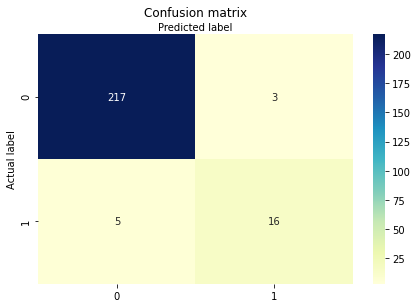

In [133]:
draw_confusion_matrix(logistic_regression,test_X,test_y)

In [134]:
roc_curve(test_y, logistic_regression.predict(test_X))

(array([0.        , 0.01363636, 1.        ]),
 array([0.        , 0.76190476, 1.        ]),
 array([2, 1, 0]))

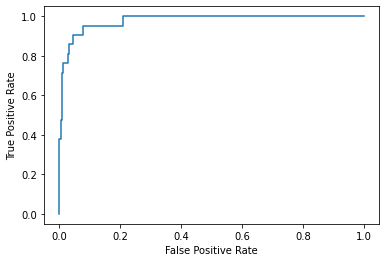

In [135]:
y_pred_proba = logistic_regression.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(test_y,y_pred_proba))


roc score: 0.9781385281385282


In [137]:
compare_RMSE(logistic_regression,train_X, train_y,test_X,test_y)

Test set RMSE: 0.1821950074697108
CV RMSE: 0.19820624179302296
Training set RMSE: 0.1267731382092775


### random forest


In [138]:
#random forest
random_forest, acc_random_forest,rf_mean_cv_score = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

Cross Validation Scores are [0.99107143 0.99107143 0.94642857 0.95535714 0.97321429]
Average Cross Validation score :0.9714285714285715
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       220
           1       0.85      0.81      0.83        21

    accuracy                           0.97       241
   macro avg       0.92      0.90      0.91       241
weighted avg       0.97      0.97      0.97       241

accuracy:  0.970954356846473


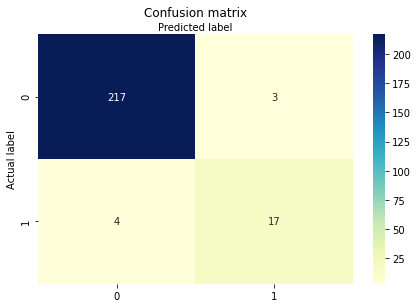

In [139]:
draw_confusion_matrix(random_forest,test_X,test_y)

In [140]:
compare_RMSE(random_forest,train_X, train_y,test_X,test_y)

Test set RMSE: 0.1704278238830942
CV RMSE: 0.1690308509457033
Training set RMSE: 0.0


In [141]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

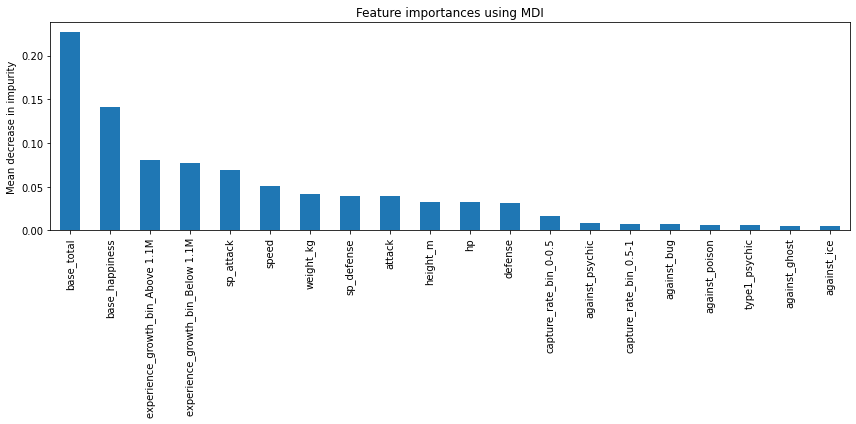

In [142]:
forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [143]:
#SGD
SGD, acc_sgd,SGD_mean_cv_score = classifier(SGDClassifier())

Cross Validation Scores are [0.91964286 0.94642857 0.90178571 0.9375     0.91071429]
Average Cross Validation score :0.9232142857142858
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       220
           1       0.73      0.76      0.74        21

    accuracy                           0.95       241
   macro avg       0.85      0.87      0.86       241
weighted avg       0.96      0.95      0.95       241

accuracy:  0.9543568464730291


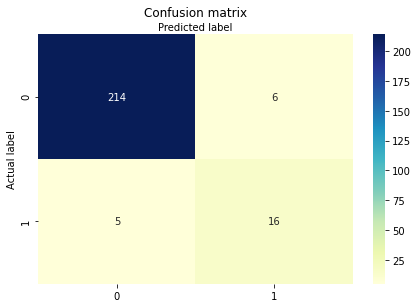

In [144]:
draw_confusion_matrix(SGD,test_X,test_y)

In [145]:
# Evaluate the model by comparing three RMSE's.
compare_RMSE(SGD,train_X, train_y,test_X,test_y)

Test set RMSE: 0.21364258359926971
CV RMSE: 0.27386127875258304
Training set RMSE: 0.24640269015229058


### decision tree

In [146]:
#decision tree
decision_tree, acc_decision_tree, decision_tree_mean_cv_score= classifier(DecisionTreeClassifier())

Cross Validation Scores are [0.98214286 0.99107143 0.98214286 0.92857143 0.98214286]
Average Cross Validation score :0.9732142857142856
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       0.80      0.76      0.78        21

    accuracy                           0.96       241
   macro avg       0.89      0.87      0.88       241
weighted avg       0.96      0.96      0.96       241

accuracy:  0.9626556016597511


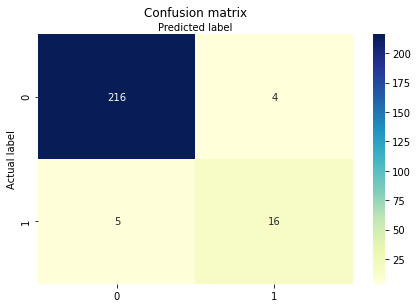

In [147]:
draw_confusion_matrix(decision_tree,test_X,test_y)

In [148]:
compare_RMSE(decision_tree,train_X, train_y,test_X,test_y)

Test set RMSE: 0.19324698792024925
CV RMSE: 0.16366341767699427
Training set RMSE: 0.0


### SVC

In [149]:
#Linear SVC
linear_SVC, acc_linear_svc,linear_SVC_mean_cv_score = classifier(LinearSVC(max_iter = 100))

Cross Validation Scores are [0.94642857 0.97321429 0.91071429 0.90178571 0.91071429]
Average Cross Validation score :0.9285714285714286
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       220
           1       0.92      0.57      0.71        21

    accuracy                           0.96       241
   macro avg       0.94      0.78      0.84       241
weighted avg       0.96      0.96      0.95       241

accuracy:  0.9585062240663901


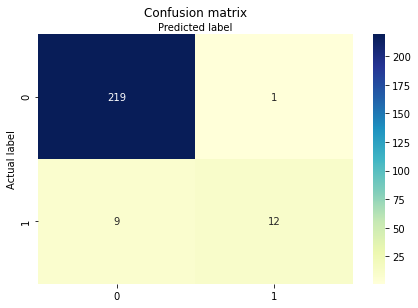

In [150]:
draw_confusion_matrix(linear_SVC,test_X,test_y)

In [151]:
compare_RMSE(linear_SVC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.20370021093167762
CV RMSE: 0.25
Training set RMSE: 0.23904572186687872


### GaussianNB


In [152]:
#GaussianNB
gaussian_NB, acc_gnb,gaussian_NB_mean_cv_score = classifier(GaussianNB())

Cross Validation Scores are [0.63392857 0.65178571 0.70535714 0.74107143 0.76785714]
Average Cross Validation score :0.7
              precision    recall  f1-score   support

           0       0.98      0.71      0.83       220
           1       0.22      0.86      0.35        21

    accuracy                           0.73       241
   macro avg       0.60      0.79      0.59       241
weighted avg       0.92      0.73      0.79       241

accuracy:  0.7261410788381742


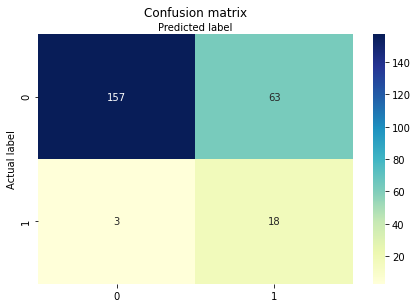

In [153]:
draw_confusion_matrix(gaussian_NB,test_X,test_y)

In [154]:
compare_RMSE(gaussian_NB,train_X, train_y,test_X,test_y)

Test set RMSE: 0.5233153171481089
CV RMSE: 0.5244044240850758
Training set RMSE: 0.50709255283711


### KNeighbors Classifier


In [155]:
#KNeighbors Classifier
kneighbors, acc_knn,kneighbors_mean_cv_score = classifier(KNeighborsClassifier())

Cross Validation Scores are [0.9375     0.95535714 0.92857143 0.94642857 0.95535714]
Average Cross Validation score :0.9446428571428571
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       220
           1       0.72      0.62      0.67        21

    accuracy                           0.95       241
   macro avg       0.84      0.80      0.82       241
weighted avg       0.94      0.95      0.94       241

accuracy:  0.946058091286307


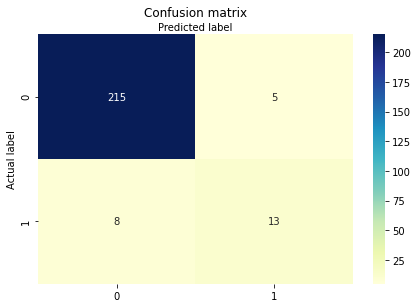

In [156]:
draw_confusion_matrix(kneighbors,test_X,test_y)

In [157]:
compare_RMSE(kneighbors,train_X, train_y,test_X,test_y)

Test set RMSE: 0.23225397459180963
CV RMSE: 0.22756474745819988
Training set RMSE: 0.1742330131092924


### Perceptron


In [158]:
#Perceptron
perceptron, acc_perceptron,perceptron_mean_cv_score = classifier(Perceptron())

Cross Validation Scores are [0.9375     0.94642857 0.92857143 0.9375     0.94642857]
Average Cross Validation score :0.9392857142857143
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       220
           1       0.87      0.62      0.72        21

    accuracy                           0.96       241
   macro avg       0.92      0.80      0.85       241
weighted avg       0.96      0.96      0.96       241

accuracy:  0.9585062240663901


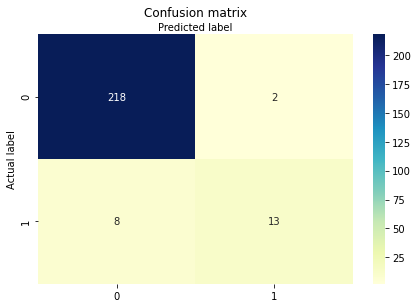

In [159]:
draw_confusion_matrix(perceptron,test_X,test_y)

In [160]:
compare_RMSE(perceptron,train_X, train_y,test_X,test_y)

Test set RMSE: 0.20370021093167762
CV RMSE: 0.26049403612586386
Training set RMSE: 0.23904572186687872


### All Model Accuracy

In [161]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Average CV score': [log_mean_cv_score, linear_SVC_mean_cv_score, 
              kneighbors_mean_cv_score,  decision_tree_mean_cv_score, rf_mean_cv_score, gaussian_NB_mean_cv_score, 
              perceptron_mean_cv_score, SGD_mean_cv_score]   
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score,Average CV score
4,Random Forest,0.970954,0.971429
0,Logistic Regression,0.966805,0.953571
3,Decision Tree,0.962656,0.973214
1,Linear SVC,0.958506,0.928571
6,Perceptron,0.958506,0.939286
7,Stochastic Gradient Descent,0.954357,0.923214
2,KNN,0.946058,0.944643
5,Gaussain Naive Bayes,0.726141,0.700000
